# Análisis de datos nulos

In [1]:
# Librerias
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
#enable_iterative_imputer() 
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from fuzzywuzzy import process
import pandas as pd

In [2]:
# Definir la paleta de colores personalizada
custom_colors = ['#1F3040', '#B9CDCA', '#F2C6AC', '#D99982', '#735749']

In [3]:
ventas = pd.read_csv('C:/UNINORTE/VC/Proyecto2/Informe/docs/datos4.csv')

In [4]:
ventas.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,135094.0,5.647384e+00,2.210987e+00,3.254000e+00,4.649485e+00,4.720665e+00,6.205749e+00,1.104366e+01
long,136123.0,-7.485399e+01,8.810261e-01,-7.657617e+01,-7.556735e+01,-7.418215e+01,-7.406466e+01,-7.396190e+01
price,157909.0,4.961173e+08,4.050359e+08,2.000000e+06,2.400000e+08,3.700000e+08,6.000000e+08,4.900000e+09
rooms,153653.0,2.983157e+00,1.020468e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,7.000000e+00
baths,156636.0,2.558543e+00,1.123930e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
park,156972.0,1.171884e+00,9.385208e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
area_privada,106558.0,1.115772e+02,6.274762e+01,1.000000e+00,6.500000e+01,9.200000e+01,1.410000e+02,3.240000e+02
area_const,151637.0,1.126387e+02,6.388135e+01,1.000000e+00,6.500000e+01,9.300000e+01,1.430000e+02,3.250000e+02
admon,97043.0,3.527261e+05,2.487091e+05,0.000000e+00,1.673000e+05,2.900000e+05,4.910000e+05,1.121000e+06
Estrato,155484.0,4.353715e+00,1.279689e+00,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,6.000000e+00


In [5]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157909 entries, 0 to 157908
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   lat                  135094 non-null  float64
 1   long                 136123 non-null  float64
 2   category             157909 non-null  object 
 3   price                157909 non-null  float64
 4   rooms                153653 non-null  float64
 5   baths                156636 non-null  float64
 6   park                 156972 non-null  float64
 7   ciudad               157909 non-null  object 
 8   barrio               157690 non-null  object 
 9   area_privada         106558 non-null  float64
 10  area_const           151637 non-null  float64
 11  admon                97043 non-null   float64
 12  Estrato              155484 non-null  float64
 13  Estado               91725 non-null   float64
 14  Antiguedad           130407 non-null  object 
 15  Piso No          

In [6]:
# DataFrame para el análisis de datos nulos y datos únicos
analisis_nulos = pd.DataFrame({
    'Conteo': ventas.isnull().sum(),  # Conteo de valores nulos
    'Porcentaje': (ventas.isnull().sum() / len(ventas)) * 100,  # Porcentaje de valores nulos
    'Porcentaje_Unicos': (ventas.nunique() / len(ventas)) * 100  # Porcentaje de valores únicos
})

print(analisis_nulos)

                     Conteo  Porcentaje  Porcentaje_Unicos
lat                   22815   14.448195          45.972047
long                  21786   13.796554          25.176526
category                  0    0.000000           0.001900
price                     0    0.000000           2.576801
rooms                  4256    2.695223           0.004433
baths                  1273    0.806161           0.004433
park                    937    0.593380           0.003800
ciudad                    0    0.000000           0.005066
barrio                  219    0.138687           3.558379
area_privada          51351   32.519362           0.514853
area_const             6272    3.971908           1.484399
admon                 60866   38.544985           3.071389
Estrato                2425    1.535695           0.003800
Estado                66184   41.912747           0.001900
Antiguedad            27502   17.416360           0.003166
Piso No               61828   39.154196           0.0101

In [7]:
# Gráfico para el conteo de valores nulos con la paleta de colores especificada
colors = ['#F2C6AC', '#1F3040', '#B9CDCA','#D99982', '#735749']  # Definir la paleta de colores
fig_conteo = px.bar(analisis_nulos, x=analisis_nulos.index, y='Conteo', title='Conteo de valores nulos por columna',
                    color_discrete_sequence=colors)
fig_conteo.update_layout(xaxis_title='Columnas', yaxis_title='Conteo de valores nulos', xaxis_tickangle=-45)
fig_conteo.show()

# Gráfico para el porcentaje de valores nulos
fig = go.Figure()

# Agregar las barras para el porcentaje de valores nulos
fig.add_trace(go.Bar(
    x=analisis_nulos.index,
    y=analisis_nulos['Porcentaje'],
    name='Porcentaje de Nulos',
    marker_color=colors[0]  # Asignar el primer color de la paleta
))

# Agregar una línea para el porcentaje de datos únicos
fig.add_trace(go.Scatter(
    x=analisis_nulos.index,
    y=analisis_nulos['Porcentaje_Unicos'],
    name='Porcentaje de Datos Únicos',
    mode='lines+markers',
    line=dict(color=colors[1]),  # Asignar el segundo color de la paleta
    marker=dict(color=colors[1])  # Usar otro color para los marcadores
))

# Actualizar el layout para incluir título y nombres de ejes
fig.update_layout(
    title='Porcentaje de valores nulos y únicos por columna',
    xaxis_title='Columnas',
    yaxis_title='Porcentaje (%)',
    xaxis_tickangle=-45,
    yaxis=dict(
        title='Porcentaje (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
    )
)

# Mostrar el gráfico
fig.show()

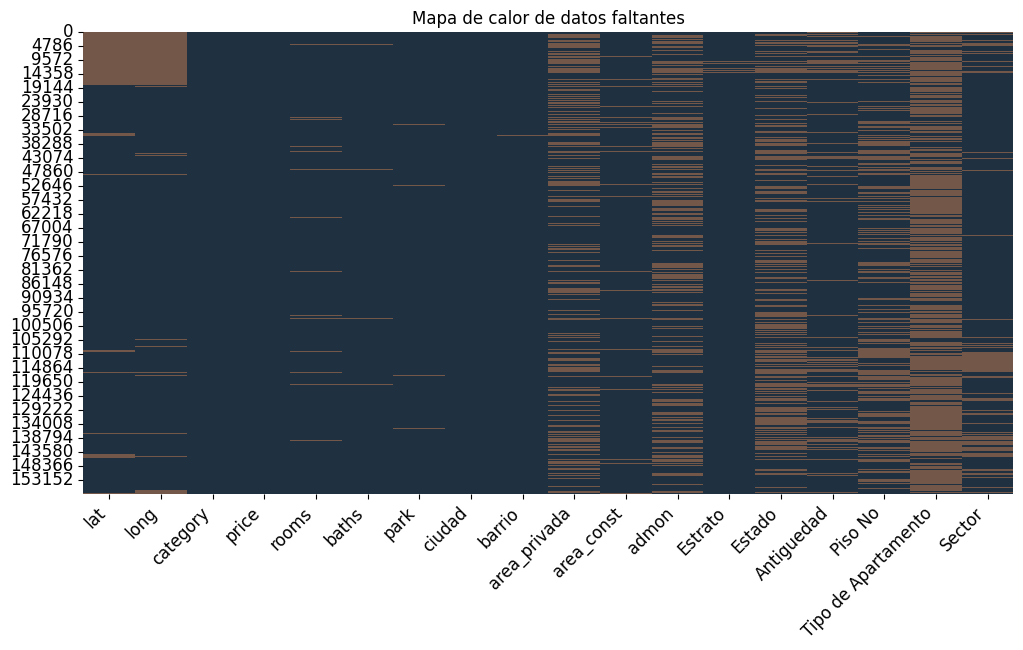

In [8]:
# Mapa de calor de datos faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(ventas.isnull(), cbar=False, cmap=custom_colors)
plt.title('Mapa de calor de datos faltantes')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

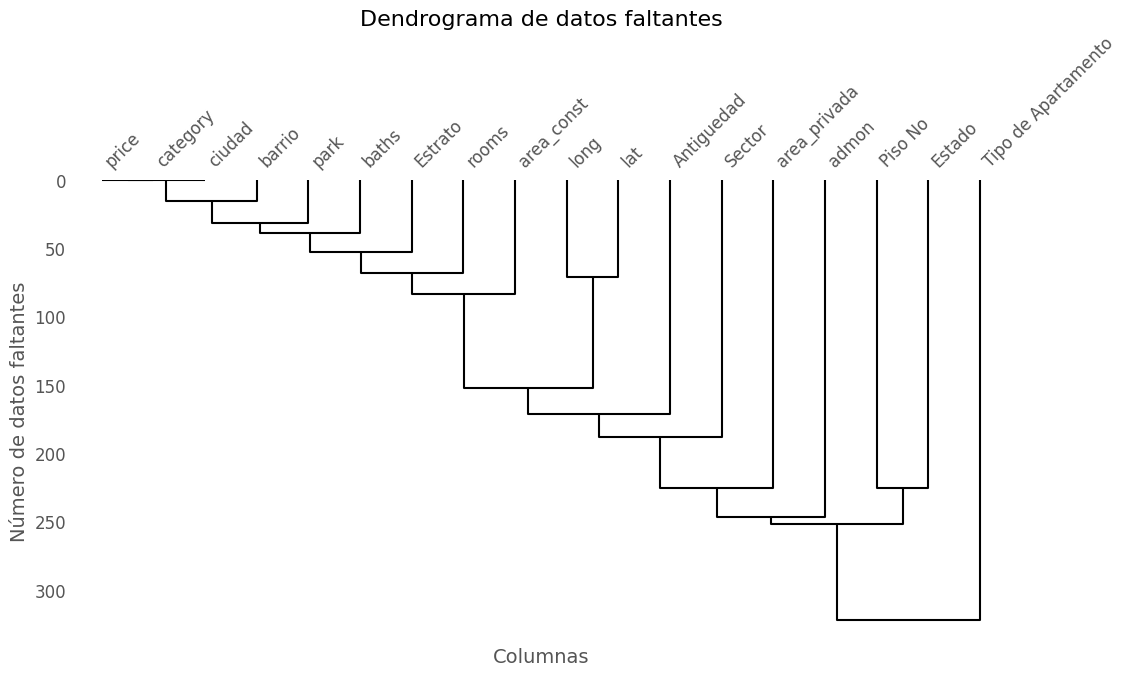

In [9]:
# Establecer estilo de gráfico
plt.style.use('ggplot')

# Crear el dendrograma de datos faltantes
msno.dendrogram(ventas, figsize=(12, 6))

# Personalizar el gráfico
plt.title('Dendrograma de datos faltantes', fontsize=16)
plt.ylabel('Número de datos faltantes', fontsize=14)
plt.xlabel('Columnas', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

### Imputación/eliminación de datos nulos

#### Eliminación:

In [10]:
# Eliminar filas donde 'price' es nulo
ventas = ventas.dropna(subset=['price'])

In [11]:
# Eliminar filas donde 'barrio' es nulo
ventas = ventas.dropna(subset=['barrio'])

#### Imputación de acuerdo con otras columnas:

In [12]:
# Actualizar 'area_privada' con los valores de 'area_const' cuando 'area_privada' es nula
ventas['area_privada'] = ventas['area_privada'].fillna(ventas['area_const'])

In [13]:
# Asignar el valor 1 a 'Piso No' donde la categoría es 'casa' y 'Piso No' es nulo
ventas.loc[(ventas['category'] == 'Casa') & (ventas['Piso No'].isnull()), 'Piso No'] = 1

In [14]:
ventas.loc[(ventas['category'] == 'Casa') & (ventas['Tipo de Apartamento'].isnull()), 'Tipo de Apartamento'] = 'No Aplica'

#### Imputación de acuerdo con la misma columna:

In [15]:
# Rellenar valores nulos en la columna 'Sector' con 'No Especificado'
ventas['Sector'] = ventas['Sector'].fillna('No Especificado')

In [16]:
# Rellenar valores nulos en la columna 'Tipo de Apartamento' con 'No Especificado'
ventas['Tipo de Apartamento'] = ventas['Tipo de Apartamento'].fillna('No Especificado')

In [17]:
# Asegurarse de que 'Antiguedad' es una columna categórica
if not pd.api.types.is_categorical_dtype(ventas['Antiguedad']):
    ventas['Antiguedad'] = ventas['Antiguedad'].astype('category')

# Agregar 'No Especificado' a las categorías de la columna 'Antiguedad'
if 'No Especificado' not in ventas['Antiguedad'].cat.categories:
    ventas['Antiguedad'] = ventas['Antiguedad'].cat.add_categories('No Especificado')

# Rellenar valores nulos en la columna 'Antiguedad' con 'No Especificado'
ventas['Antiguedad'] = ventas['Antiguedad'].fillna('No Especificado')

C:\Users\Linda Herrera\AppData\Local\Temp\ipykernel_16712\2807709208.py:2: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



In [18]:
# Asegurarse de que 'Estado' es una columna categórica
if not pd.api.types.is_categorical_dtype(ventas['Estado']):
    ventas['Estado'] = ventas['Estado'].astype('category')

# Agregar 'No Especificado' a las categorías de la columna 'Estado'
if 'No Especificado' not in ventas['Estado'].cat.categories:
    ventas['Estado'] = ventas['Estado'].cat.add_categories('No Especificado')

# Rellenar valores nulos en la columna 'Estado' con 'No Especificado'
ventas['Estado'] = ventas['Estado'].fillna('No Especificado')

C:\Users\Linda Herrera\AppData\Local\Temp\ipykernel_16712\1416482886.py:2: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



In [19]:
# DataFrame para el análisis de datos nulos y datos únicos
analisis_nulos = pd.DataFrame({
    'Conteo': ventas.isnull().sum(),  # Conteo de valores nulos
    'Porcentaje': (ventas.isnull().sum() / len(ventas)) * 100,  # Porcentaje de valores nulos
    'Porcentaje_Unicos': (ventas.nunique() / len(ventas)) * 100  # Porcentaje de valores únicos
})

print(analisis_nulos)

                     Conteo  Porcentaje  Porcentaje_Unicos
lat                   22710   14.401674          45.994673
long                  21697   13.759275          25.193100
category                  0    0.000000           0.001902
price                     0    0.000000           2.570233
rooms                  4246    2.692625           0.004439
baths                  1272    0.806646           0.004439
park                    937    0.594204           0.003805
ciudad                    0    0.000000           0.004439
barrio                    0    0.000000           3.563320
area_privada           5512    3.495466           1.038747
area_const             6260    3.969814           1.485827
admon                 60725   38.509100           3.071850
Estrato                2345    1.487095           0.003805
Estado                    0    0.000000           0.002537
Antiguedad                0    0.000000           0.003805
Piso No               43286   27.450060           0.0101

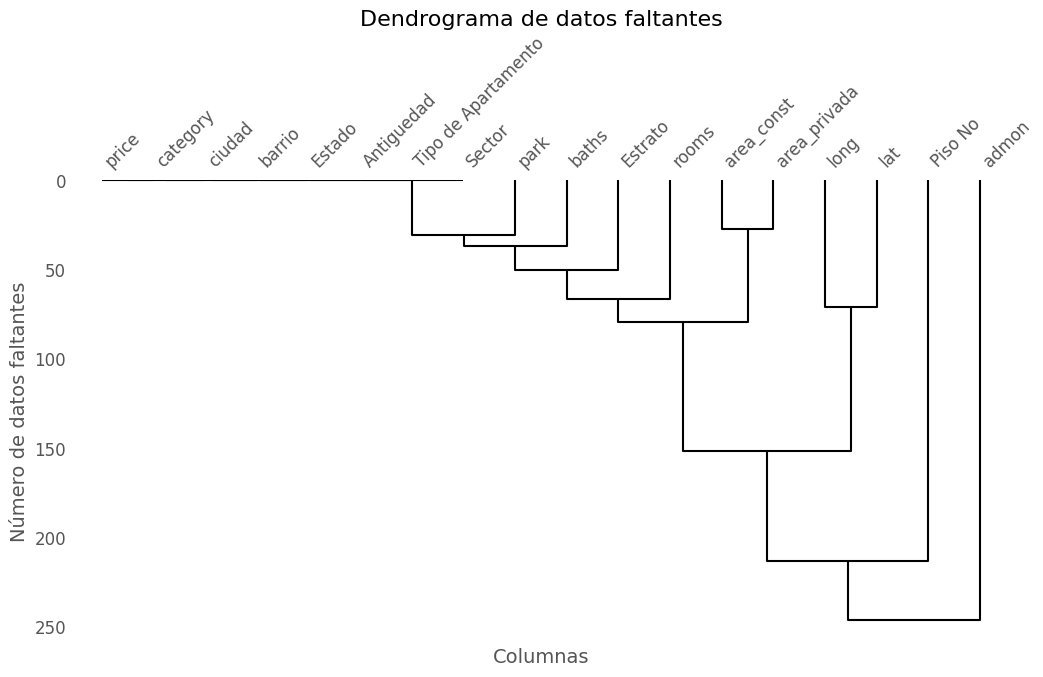

In [20]:
# Establecer estilo de gráfico
plt.style.use('ggplot')

# Crear el dendrograma de datos faltantes
msno.dendrogram(ventas, figsize=(12, 6))

# Personalizar el gráfico
plt.title('Dendrograma de datos faltantes', fontsize=16)
plt.ylabel('Número de datos faltantes', fontsize=14)
plt.xlabel('Columnas', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

## Imputación usando IterativeImputer

In [21]:
# Define which columns are numeric and which are categorical
numeric_features = ['rooms', 'baths', 'park', 'area_const', 'area_privada', 'admon', 'price', 'Estrato']
categorical_features = ['category', 'ciudad', 'Antiguedad', 'Tipo de Apartamento']

# Define transformers
numeric_transformer = Pipeline([
    ('imputer', IterativeImputer(random_state=0)),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine processing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Setup the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit the data
pipeline.fit(ventas)

# Transform the data
X_transformed = pipeline.transform(ventas)

# Get the scaler from the pipeline
scaler = pipeline.named_steps['preprocessor'].named_transformers_['num'].named_steps['scaler']

# Inverse transform the scaled numeric data
numeric_data = scaler.inverse_transform(
    X_transformed[:, :len(numeric_features)]
)

# Extract categorical data after encoding
categorical_data = X_transformed[:, len(numeric_features):]

# Combine all transformed features
all_features = numeric_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out())
imputed_data = pd.DataFrame(
    np.hstack([numeric_data, categorical_data]),
    columns=all_features,
    index=ventas.index
)

# Update the ventas DataFrame with the numeric data
ventas.update(imputed_data[numeric_features])

print(ventas.info())

<class 'pandas.core.frame.DataFrame'>
Index: 157690 entries, 0 to 157908
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   lat                  134980 non-null  float64 
 1   long                 135993 non-null  float64 
 2   category             157690 non-null  object  
 3   price                157690 non-null  float64 
 4   rooms                157690 non-null  float64 
 5   baths                157690 non-null  float64 
 6   park                 157690 non-null  float64 
 7   ciudad               157690 non-null  object  
 8   barrio               157690 non-null  object  
 9   area_privada         157690 non-null  float64 
 10  area_const           157690 non-null  float64 
 11  admon                157690 non-null  float64 
 12  Estrato              157690 non-null  float64 
 13  Estado               157690 non-null  category
 14  Antiguedad           157690 non-null  category
 15  Piso 

## Imputación datos referentes a locación

In [22]:
# Calcular los promedios por ciudad, barrio, y sector
promedios_ciudad_barrio_sector = ventas.groupby(['ciudad', 'barrio', 'Sector'])[['lat', 'long']].mean().reset_index()
promedios_ciudad_barrio = ventas.groupby(['ciudad', 'barrio'])[['lat', 'long']].mean().reset_index()
promedios_ciudad = ventas.groupby('ciudad')[['lat', 'long']].mean().reset_index()

# Definir una función para imputar lat y long basada en los promedios calculados
def imputar_lat_long(row):
    if pd.isnull(row['lat']) or pd.isnull(row['long']):
        # Intentar imputar con ciudad, barrio, y sector
        mask = (promedios_ciudad_barrio_sector['ciudad'] == row['ciudad']) & \
               (promedios_ciudad_barrio_sector['barrio'] == row['barrio']) & \
               (promedios_ciudad_barrio_sector['Sector'] == row['Sector'])
        result = promedios_ciudad_barrio_sector[mask]
        if not result.empty:
            row['lat'] = result['lat'].values[0] if pd.isnull(row['lat']) else row['lat']
            row['long'] = result['long'].values[0] if pd.isnull(row['long']) else row['long']
        else:
            # Intentar imputar con ciudad y barrio
            mask = (promedios_ciudad_barrio['ciudad'] == row['ciudad']) & \
                   (promedios_ciudad_barrio['barrio'] == row['barrio'])
            result = promedios_ciudad_barrio[mask]
            if not result.empty:
                row['lat'] = result['lat'].values[0] if pd.isnull(row['lat']) else row['lat']
                row['long'] = result['long'].values[0] if pd.isnull(row['long']) else row['long']
            else:
                # Intentar imputar solo con ciudad
                mask = (promedios_ciudad['ciudad'] == row['ciudad'])
                result = promedios_ciudad[mask]
                if not result.empty:
                    row['lat'] = result['lat'].values[0] if pd.isnull(row['lat']) else row['lat']
                    row['long'] = result['long'].values[0] if pd.isnull(row['long']) else row['long']
    return row

# Aplicar la función a cada fila del DataFrame
ventas = ventas.apply(imputar_lat_long, axis=1)

In [23]:
# Eliminar filas donde 'lat' o 'long' tienen valores NaN (vacíos)
ventas = ventas.dropna(subset=['lat', 'long'])

In [24]:
# DataFrame para el análisis de datos nulos incluyendo el porcentaje de datos únicos
analisis_nulos = pd.DataFrame({
    'Conteo': ventas.isnull().sum(),  # Conteo de valores nulos
    'Porcentaje': (ventas.isnull().sum() / len(ventas)) * 100,  # Porcentaje de valores nulos
    'Porcentaje_Unicos': (ventas.nunique() / len(ventas)) * 100  # Porcentaje de valores únicos
})

print(analisis_nulos)

                     Conteo  Porcentaje  Porcentaje_Unicos
lat                       0    0.000000          48.153831
long                      0    0.000000          26.973985
category                  0    0.000000           0.001934
price                     0    0.000000           2.585345
rooms                     0    0.000000           2.490571
baths                     0    0.000000           0.759486
park                      0    0.000000           0.542213
ciudad                    0    0.000000           0.004513
barrio                    0    0.000000           3.043745
area_privada              0    0.000000           3.953451
area_const                0    0.000000           4.872828
admon                     0    0.000000          36.580381
Estrato                   0    0.000000           1.158570
Estado                    0    0.000000           0.002579
Antiguedad                0    0.000000           0.003868
Piso No               42596   27.462687           0.0103

In [25]:
# Gráfico para el conteo de valores nulos con la paleta de colores especificada
colors = ['#F2C6AC', '#1F3040', '#B9CDCA','#D99982', '#735749']  # Definir la paleta de colores
fig_conteo = px.bar(analisis_nulos, x=analisis_nulos.index, y='Conteo', title='Conteo de valores nulos por columna',
                    color_discrete_sequence=colors)
fig_conteo.update_layout(xaxis_title='Columnas', yaxis_title='Conteo de valores nulos', xaxis_tickangle=-45)
fig_conteo.show()

# Gráfico para el porcentaje de valores nulos
fig = go.Figure()

# Agregar las barras para el porcentaje de valores nulos
fig.add_trace(go.Bar(
    x=analisis_nulos.index,
    y=analisis_nulos['Porcentaje'],
    name='Porcentaje de Nulos',
    marker_color=colors[0]  # Asignar el primer color de la paleta
))

# Agregar una línea para el porcentaje de datos únicos
fig.add_trace(go.Scatter(
    x=analisis_nulos.index,
    y=analisis_nulos['Porcentaje_Unicos'],
    name='Porcentaje de Datos Únicos',
    mode='lines+markers',
    line=dict(color=colors[1]),  # Asignar el segundo color de la paleta
    marker=dict(color=colors[1])  # Usar otro color para los marcadores
))

# Actualizar el layout para incluir título y nombres de ejes
fig.update_layout(
    title='Porcentaje de valores nulos y únicos por columna',
    xaxis_title='Columnas',
    yaxis_title='Porcentaje (%)',
    xaxis_tickangle=-45,
    yaxis=dict(
        title='Porcentaje (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
    )
)

# Mostrar el gráfico
fig.show()

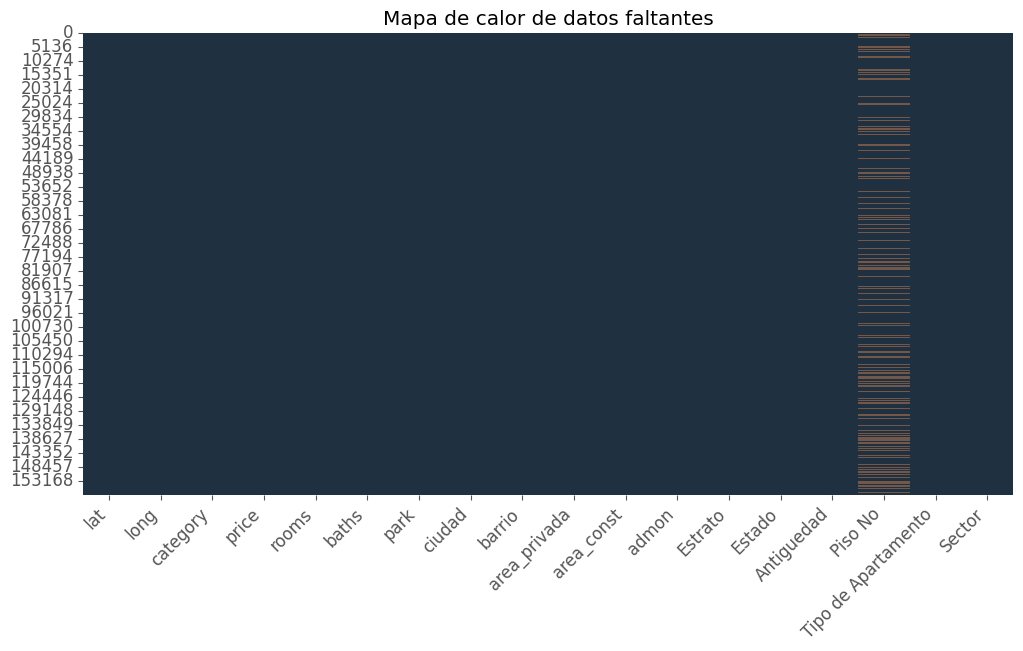

In [26]:
# Mapa de calor de datos faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(ventas.isnull(), cbar=False, cmap=custom_colors)
plt.title('Mapa de calor de datos faltantes')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [27]:
# Reemplazar valores menores a 0 en admon
ventas['admon'] = ventas['admon'].apply(lambda x: 0 if x < 0 else x)

In [28]:
# Reemplazar valores mayores a 6 en estrato
ventas['Estrato'] = ventas['Estrato'].apply(lambda x: 6 if x > 6 else x)

In [29]:
ventas.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,155105.0,5.652091e+00,2.204566e+00,3.254000e+00,4.648077e+00,4.721532e+00,6.210060e+00,1.104366e+01
long,155105.0,-7.487562e+01,8.883420e-01,-7.657500e+01,-7.557198e+01,-7.420027e+01,-7.406731e+01,-7.396190e+01
price,155105.0,4.984872e+08,4.051956e+08,2.000000e+06,2.400000e+08,3.750000e+08,6.000000e+08,4.900000e+09
rooms,155105.0,3.016952e+00,1.046944e+00,1.000000e+00,2.785714e+00,3.000000e+00,3.000000e+00,7.676206e+00
baths,155105.0,2.563615e+00,1.120647e+00,8.593324e-01,2.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
park,155105.0,1.185103e+00,9.402160e-01,-9.909311e-02,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
area_privada,155105.0,1.114881e+02,6.199171e+01,1.000000e+00,6.500000e+01,9.400000e+01,1.390000e+02,3.250000e+02
area_const,155105.0,1.139092e+02,6.337710e+01,1.000000e+00,6.600000e+01,9.600000e+01,1.440000e+02,3.319651e+02
admon,155105.0,3.498544e+05,2.571560e+05,0.000000e+00,1.600000e+05,2.840000e+05,4.790000e+05,2.118338e+06
Estrato,155105.0,4.359208e+00,1.265917e+00,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,6.000000e+00


Nota: La variable 'Piso No' será excluida de nuestro análisis al tener demasiados valores nulos, que no pudieron ser imputados con ninguna técnica de imputación, adicionalmente solo tiene explicación para una de las categorías de inmuebles (Apartamentos).